**STEP1:- DATA LOADING**

In [ ]:
# Importing imp. python libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Installing Category encoder:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.0 MB/s eta 0:00:00


In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor,ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,median_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder
import category_encoders as ce

In [ ]:
# Reading CSV file of dataset:
data = pd.read_csv("/content/bengaluru_house_prices.csv");

# View dataset:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
# View size of Dataset:
print(f'Size of the dataset: {data.shape}')
print(f'Number of rows in the dataset: {data.shape[0]}')
print(f'Number of columns in the dataset: {data.shape[1]}')

Size of the dataset: (13320, 9)
Number of rows in the dataset: 13320
Number of columns in the dataset: 9


In [ ]:
# Checking for the total number of null values in the dataset:
missing_count = data.isnull().sum()
missing_count

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
# View information of data like datatype:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
# View Statistical measures of data:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [ ]:
# Display all columns of dataset:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

**STEP2:- DATA CLEANING**

In [ ]:
# Counting unique values of "location" column:
data['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [ ]:
# Filling null value of location with whitefield:
data['location'] = data.location.fillna('Whitefield') # As loaction have only one null value it is field with whitefield (highest value)

In [ ]:
# Check data after filling null value:
data.isnull().sum()

area_type          0
availability       0
location           0
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
# Counting unique values of "size" column:
data['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [ ]:
# Extracting only numeric value from size column:
data_size =data['size'].str.extract(r'(\d+)')

In [ ]:
# Change data type of size column from object to float:
data['size_n'] =  data_size.astype(float) # Save the extracted numeric value in new column named "size_n"

In [ ]:
# Check data type of "size_n" column:
data['size_n'].dtypes

dtype('float64')

In [ ]:
# View the updated data Frame:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,size_n
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2.0


In [ ]:
# Display the data type of all the columns of data:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
 9   size_n        13304 non-null  float64
dtypes: float64(4), object(6)
memory usage: 1.0+ MB


In [ ]:
# View statistical measures of the data:
data.describe()

,bath,balcony,price,size_n
count,13247.000000,12711.000000,13320.000000,13304.000000
mean,2.692610,1.584376,112.565627,2.803743
std,1.341458,0.817263,148.971674,1.294974
min,1.000000,0.000000,8.000000,1.000000
25%,2.000000,1.000000,50.000000,2.000000
50%,2.000000,2.000000,72.000000,3.000000
75%,3.000000,2.000000,120.000000,3.000000
max,40.000000,3.000000,3600.000000,43.000000


In [ ]:
# Make the copy of the data frame:
data_copy = data.copy()

# View the copy of the data frame:
data_copy.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,size_n
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2.0


In [ ]:
# Filling the null values of "size_n" column with its mean:
data_copy["size_n"]=data_copy["size_n"].fillna(2.6)

In [ ]:
# Droping size column from copy of data frame
# data_copy = data_copy.drop('size', axis = 1)

In [ ]:
data_copy["size"] = data_copy["size"].fillna(data_copy["size"].mode().iloc[0])

In [ ]:
# Checking for droped column:
data_copy.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price', 'size_n'],
      dtype='object')

In [ ]:
# Checking columns with null values:
data_copy.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         5502
total_sqft         0
bath              73
balcony          609
price              0
size_n             0
dtype: int64

In [ ]:
# Filling null values of "bath" column with mode (most reapting value):
data_copy["bath"] = data_copy["bath"].fillna(data_copy["bath"].mode().iloc[0])

In [ ]:
# Check that all the null values of bath column is filled:
data_copy.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         5502
total_sqft         0
bath               0
balcony          609
price              0
size_n             0
dtype: int64

In [ ]:
# Counting unique values of "balcony" column:
data_copy.balcony.value_counts()

balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

In [ ]:
# View mode of "balcony" column:
data_copy['balcony'].mode()

0    2.0
Name: balcony, dtype: float64

In [ ]:
# Filling null values of "balcony" column with mode (most reapting value):
data_copy["balcony"] = data_copy["balcony"].fillna(data_copy["balcony"].mode().iloc[0])

In [ ]:
# Check that all the null values of balcony column is filled:
data_copy.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         5502
total_sqft         0
bath               0
balcony            0
price              0
size_n             0
dtype: int64

In [ ]:
# Filling all null values of society with independent:
data_copy['society'].fillna('independent', inplace= True)
data_copy['society'] = data_copy['society'].str.lower()

In [ ]:
# Check that null values of all the columns are filled:
data_copy.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
size_n          0
dtype: int64

**STEP3:- DATA VISUALIZATION**

In [ ]:
# Counting the unique values of "area type" column:
area_count = data_copy['area_type'].value_counts()
area_count

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

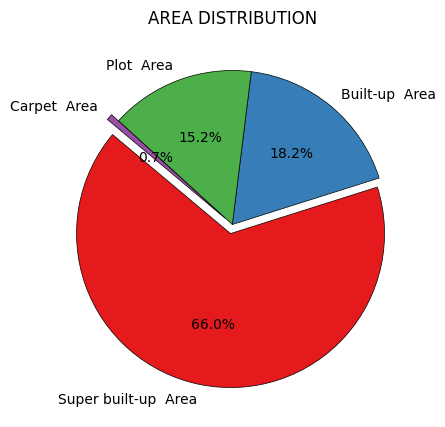

In [ ]:
# Constructing Pie-chart of area distribution:

# Set size of the figure:
plt.figure(figsize=(8, 5))

# make pie-chart:
plt.pie(area_count, labels=area_count.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set1'),explode=[0.06,0,0,0.06],wedgeprops=dict(edgecolor='black', linewidth=0.5))

# Give tittle to the chart:
plt.title('Area Distribution'.upper())

#Displaying the Plot:
plt.show()

In [ ]:
# Counting the unique values of "location" column:
data_copy['location'].value_counts()

location
Whitefield                        541
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [ ]:
# Defining only top 20 locations:
Top_20_loc = data_copy['location'].value_counts()[:20]

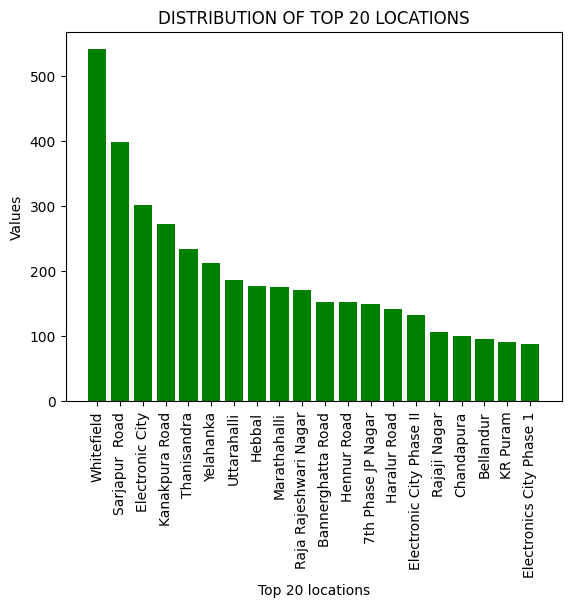

In [ ]:
# Create bar graph of distribution of top 20 locations of houses:
plt.bar(Top_20_loc.index,Top_20_loc.values,color='green')

# Set x-labels rotated at 90:
plt.xticks(rotation=90)

# Set x and y axis labels:
plt.xlabel('Top 20 locations')
plt.ylabel('Values')

# Give Tittle to the graph:
plt.title('distribution of Top 20 locations'.upper())

# Displaying the plot:
plt.show()

In [ ]:
# Counting the unique values of "size" column:
size_count = data['size'].value_counts()
size_count

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

<Axes: xlabel='size'>

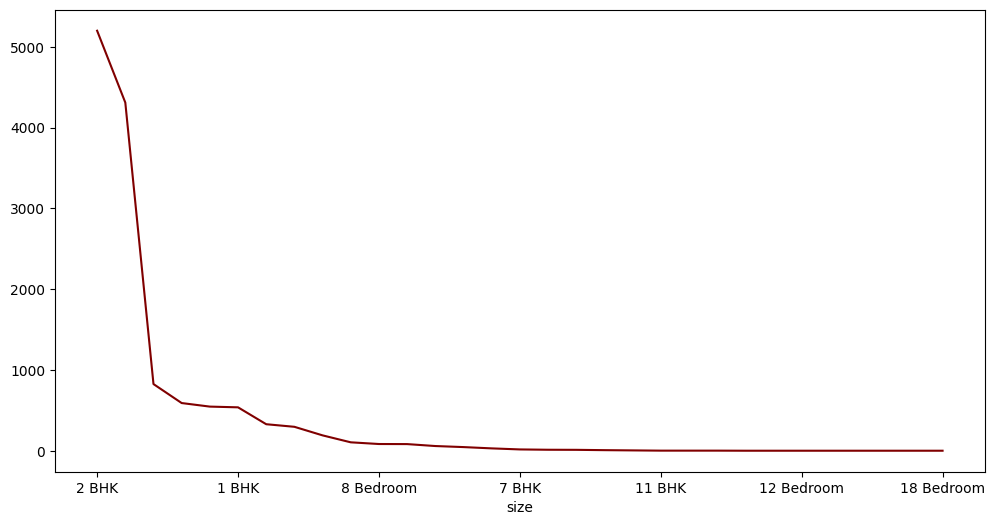

In [ ]:
# creating count plot that represents the distribution of size of houses:

# Set size of the figure:
plt.figure(figsize=(12, 6))
size_count.plot(color ='maroon')

In [ ]:
# Group size column with mean of price:
size_price = pd.DataFrame(data.groupby('size')[['price']].mean())
size_price

,price
size,
1 BHK,39.525204
1 Bedroom,72.851143
1 RK,28.122308
10 BHK,342.500000
10 Bedroom,561.250000
11 BHK,255.000000
11 Bedroom,160.000000
12 Bedroom,300.000000
13 BHK,275.000000


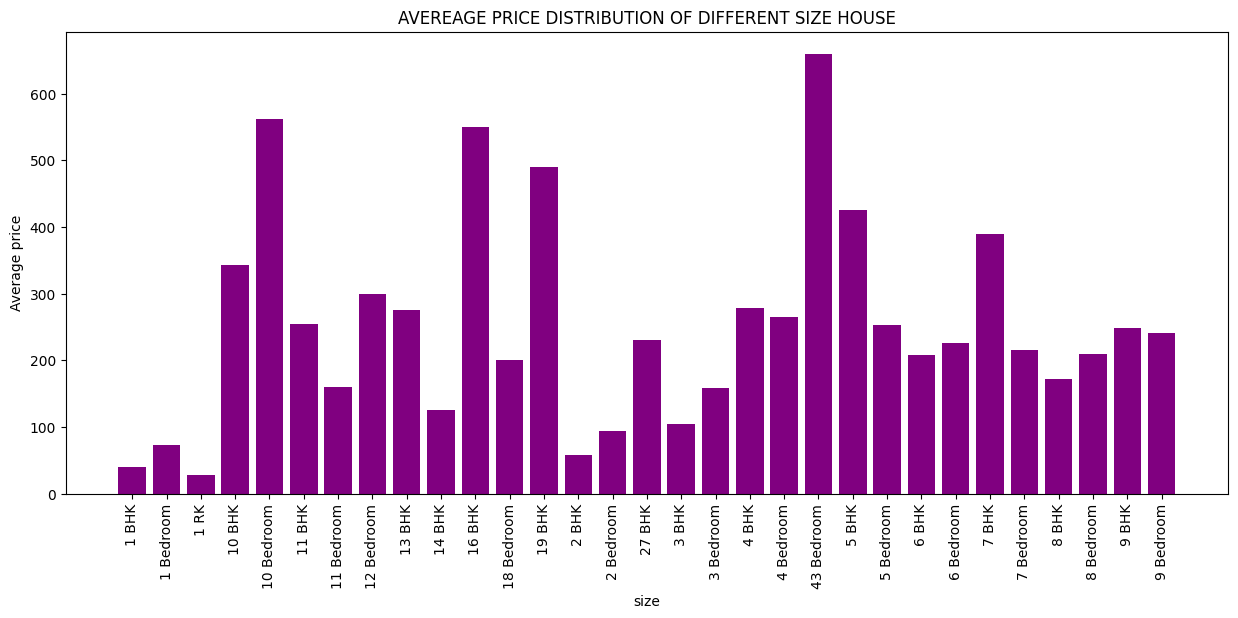

In [ ]:
# Creating bar chart of avereage price Distribution of different size house:

# Set size of the figure:
plt.figure(figsize=(15, 6))

plt.bar(size_price.index,size_price.price, color='purple')
plt.xticks(rotation=90)

# Setting lable of x and y axis:
plt.xlabel('size')
plt.ylabel('Average price')

# Give tittle to the chart:
plt.title('avereage price Distribution of different size house'.upper())

#Displaying the Plot:
plt.show()

In [ ]:
# Counting the unique values of "availability" column:
data_copy['availability'].value_counts()

availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64

In [ ]:
# Replace all values other than "ready to move" with "not ready":
selected_feature = 'Ready To Move'
data_copy.loc[data_copy['availability'] != selected_feature, 'availability'] = 'Not ready'

In [ ]:
# Again count values of availability column:
availability_count = data_copy['availability'].value_counts()
availability_count

availability
Ready To Move    10581
Not ready         2739
Name: count, dtype: int64

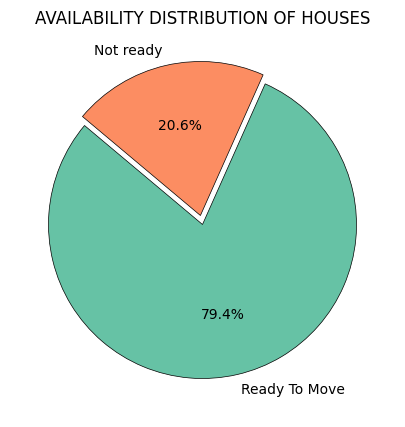

In [ ]:
# Create Pie-chart of availability distribution of houses:

# Set size of the figure:
plt.figure(figsize=(8, 5))

plt.pie(availability_count, labels=availability_count.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'),explode=[0,0.06],wedgeprops=dict(edgecolor='black', linewidth=0.5))

# Give tittle to the chart:
plt.title('availability distribution of houses'.upper())

# Displaying the plot:
plt.show()

In [ ]:
# Counting values of top 30 area of houses:
Top_30_sqft = data_copy['total_sqft'].value_counts()[:30]
Top_30_sqft

total_sqft
1200    843
1100    221
1500    205
2400    196
600     180
1000    172
1350    133
1050    123
1300    117
1250    114
900     112
1400    108
1800    104
1150    101
1600    101
1140     91
2000     83
1450     70
1650     69
800      67
3000     66
1075     66
1020     63
2500     62
1550     60
1160     60
1125     60
950      59
1180     58
1700     58
Name: count, dtype: int64

Text(0.5, 1.0, 'AREA DISTRIBUTION IN SQFT')

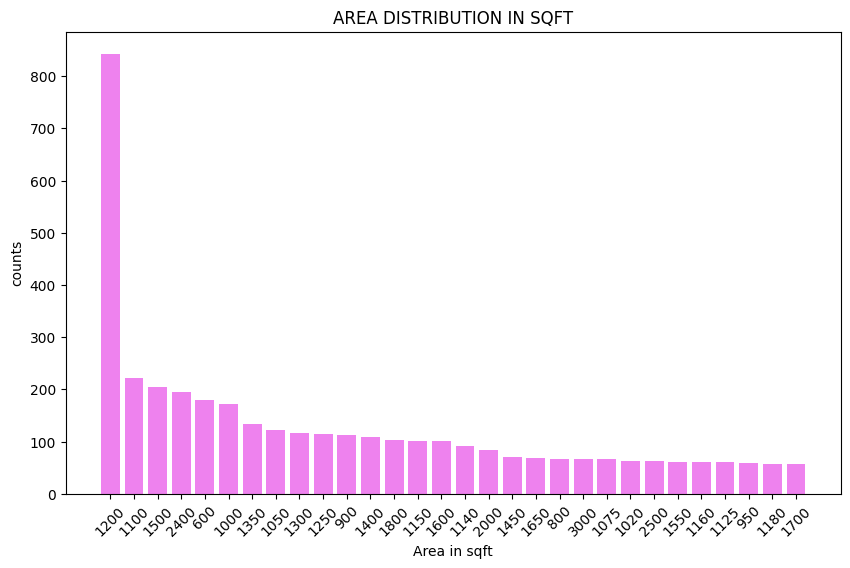

In [ ]:
# Creating bar plot of Area Distribution in sqft:

# Fix size:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
plt.bar(Top_30_sqft.index, Top_30_sqft.values, color='violet')

# Give lables to x and y axis:
plt.xlabel('Area in sqft')
plt.ylabel('counts')

# Give tittle to the chart:
plt.title('Area Distribution in sqft'.upper())

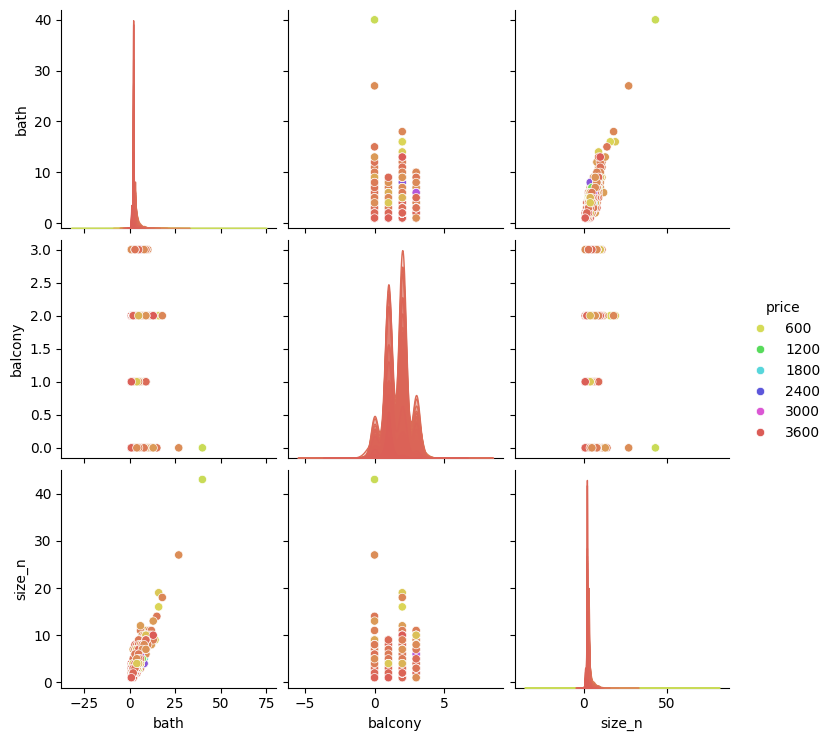

In [ ]:
# Create pair plots of the data:
sns.pairplot(data_copy,hue ='price', palette = "hls")

In [ ]:
# Dealing with abnormal values of total sqft column:
data_copy[data_copy['total_sqft'].apply(lambda x: not x.isnumeric())]['total_sqft'].head()

30     2100 - 2850
44         1330.74
56     3010 - 3410
81     2957 - 3450
122    3067 - 8156
Name: total_sqft, dtype: object

In [ ]:
def clean_total_sqft(value):
    if not value.isnumeric():
        value = value.split('-')[0]
        value = value.strip()
    return value

data_copy['total_sqft'] = data_copy['total_sqft'].apply(clean_total_sqft)

In [ ]:
non_numeric_values = data_copy[data_copy['total_sqft'].apply(lambda x: not x.isnumeric())]

In [ ]:
data_copy = data_copy[data_copy['total_sqft'].apply(lambda x: x.isnumeric())]

In [ ]:
# Converting total sqft column to float data type:
data_copy['total_sqft'] = data_copy['total_sqft'].astype(float)

<ipython-input-54-b368d4060ada>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy['total_sqft'] = data_copy['total_sqft'].astype(float)


In [ ]:
# Selecting only numerical columns from data frame:
numerical = data_copy.select_dtypes(include=["int", "float64"])

In [ ]:
# Craeting data frame of all numerical columns:
df_numerical = pd.DataFrame(numerical)
df_numerical.head()

,total_sqft,bath,balcony,price,size_n
0,1056.0,2.0,1.0,39.07,2.0
1,2600.0,5.0,3.0,120.00,4.0
2,1440.0,2.0,3.0,62.00,3.0
3,1521.0,3.0,1.0,95.00,3.0
4,1200.0,2.0,1.0,51.00,2.0


In [ ]:
# View correlation between different numerical columns of the data frame:
df_numerical.corr()

,total_sqft,bath,balcony,price,size_n
total_sqft,1.000000,0.388683,0.155825,0.574615,0.346711
bath,0.388683,1.000000,0.207292,0.452663,0.895832
balcony,0.155825,0.207292,1.000000,0.124358,0.194325
price,0.574615,0.452663,0.124358,1.000000,0.397442
size_n,0.346711,0.895832,0.194325,0.397442,1.000000


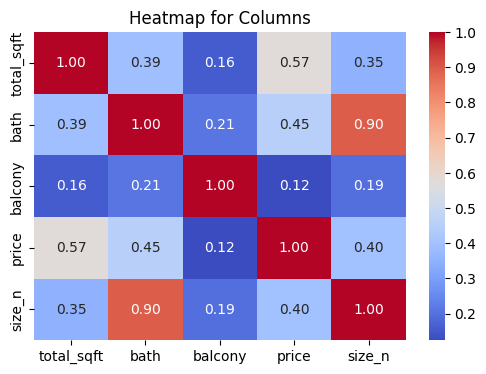

In [ ]:
# Function for creating Heat map:
def create_heatmap(data):
    plt.figure(figsize=(6,4))
    sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Heatmap for Columns')
    plt.show()

create_heatmap(df_numerical)

In [ ]:
# def boxplot(data, columns):
#   for col in columns:
#     sns.boxplot(x=data[col], color='lightgreen')
# boxplot(data_copy, df_numerical)

**STEP4- OUTLIER DETECTION**

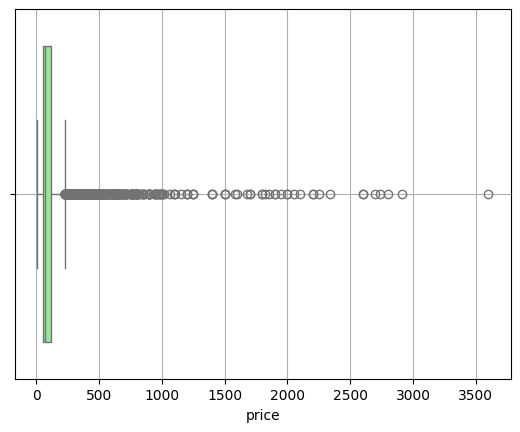

In [ ]:
# Create boxplot of price column:
sns.boxplot(x=data_copy['price'], color='lightgreen')
plt.grid()

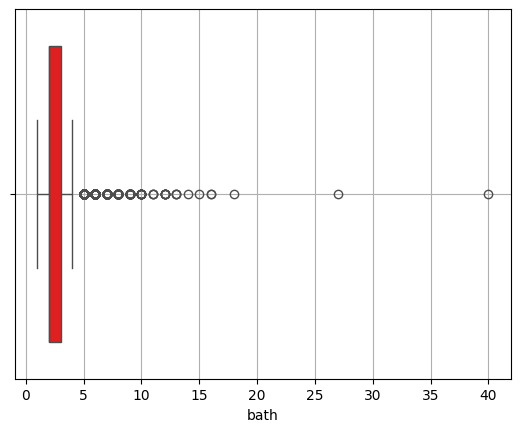

In [ ]:
# Create boxplot of bath column:
sns.boxplot(x=data_copy['bath'], color='red')
plt.grid()

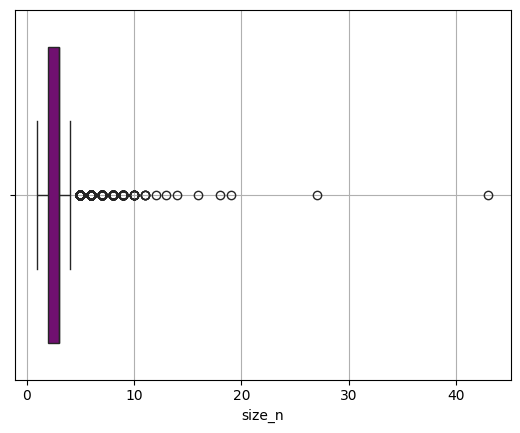

In [ ]:
# Create boxplot of size column:
sns.boxplot(x=data_copy['size_n'], color='purple')
plt.grid()

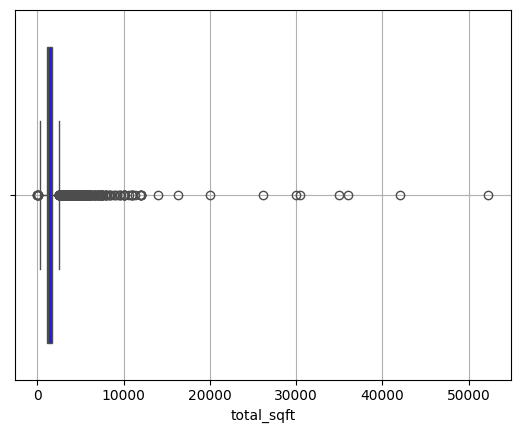

In [ ]:
# Create boxplot of total sqft area column:
sns.boxplot(x=data_copy['total_sqft'], color='blue')
plt.grid()

<ipython-input-64-185049e27f8b>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerical['price'], shade = True, color='green')


<Axes: xlabel='price', ylabel='Density'>

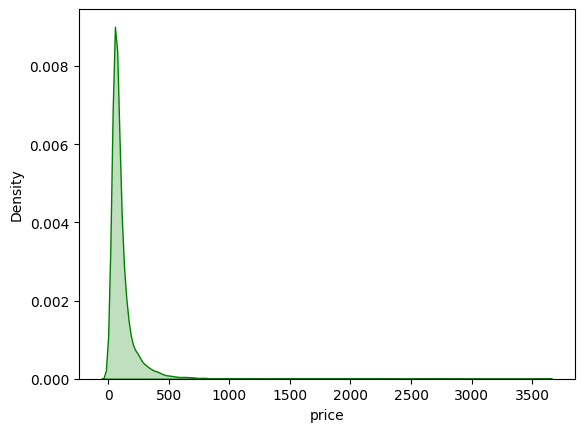

In [ ]:
# Create density plot for price column:
sns.kdeplot(df_numerical['price'], shade = True, color='green')

<ipython-input-65-4a75e6918f79>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerical['bath'], shade = True, color = 'red')


<Axes: xlabel='bath', ylabel='Density'>

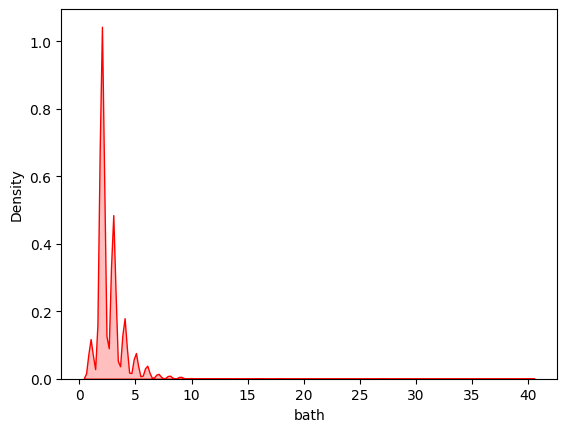

In [ ]:
# Create density plot for bath column:
sns.kdeplot(df_numerical['bath'], shade = True, color = 'red')

<ipython-input-66-de3f998c38be>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerical['size_n'], shade = True, color = 'purple')


<Axes: xlabel='size_n', ylabel='Density'>

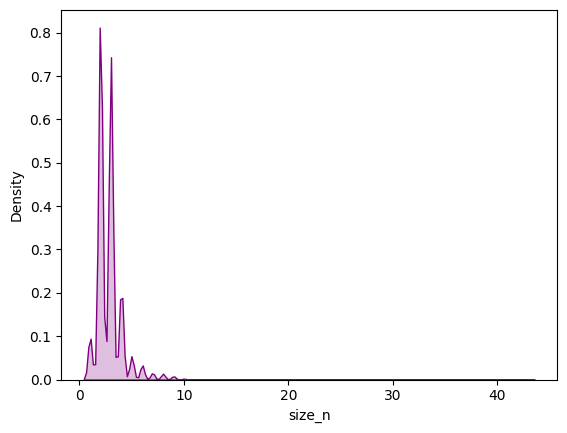

In [ ]:
# Create density plot for size column:
sns.kdeplot(df_numerical['size_n'], shade = True, color = 'purple')

<ipython-input-67-5e056e57cca5>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerical['total_sqft'], shade = True, color='blue')


<Axes: xlabel='total_sqft', ylabel='Density'>

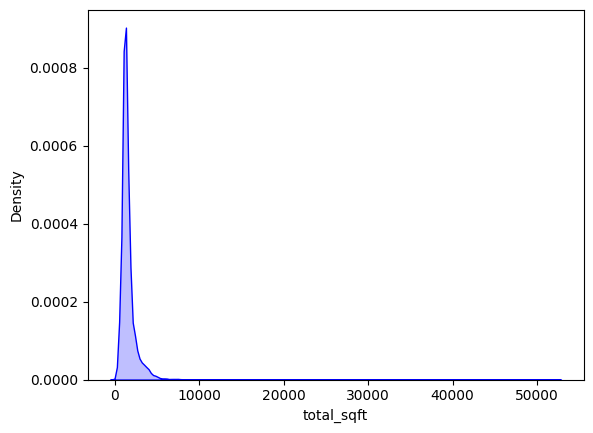

In [ ]:
# Create density plot for total sqft area column:
sns.kdeplot(df_numerical['total_sqft'], shade = True, color='blue')

In [ ]:
# Calculate Inter quantile range of price column:
Q1 = data_copy['price'].quantile(0.25)
Q3 = data_copy['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

-55.0
225.0


In [ ]:
#According to IQR, upper bound is 227.5, set bar 500 to prevent excess data loss.
data_copy = data_copy[data_copy['price'] <= 500]

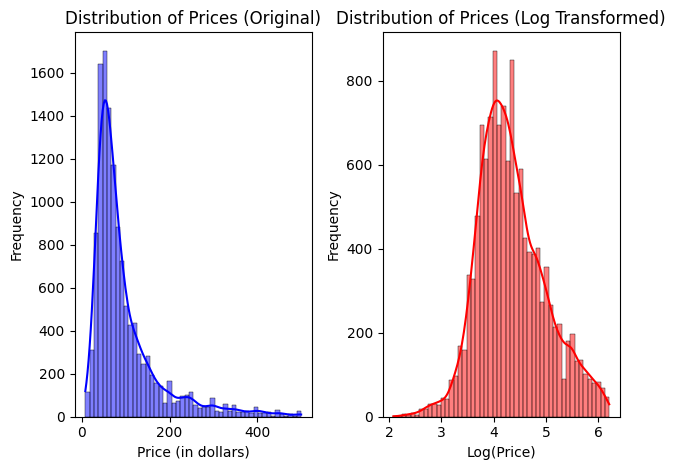

In [ ]:
# Comparision between simple and log transformed price column distribution:
plt.subplot(1, 2,1)
sns.histplot(data_copy['price'], kde=True, bins=50, color='blue')

# Gixe x and y lables to axis and tittle to the chart:
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in dollars)')
plt.ylabel('Frequency')

# Distribution plot with log transformation:
plt.subplot(1, 2, 2)
sns.histplot(np.log(data_copy['price']), kde=True, bins=50, color='red')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# select the data with only less than 9 bathrooms as the most of the data distribution of bath column is below 9:
data_copy=data_copy[data_copy['bath']<=9]

In [ ]:
# select the data with only less than 10000 bathrooms as the most of the data distribution of bath column is below 10000:
data_copy = data_copy[data_copy['total_sqft']<= 10000]

In [ ]:
data_copy.shape

(12909, 10)

In [ ]:
data_copy.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
size_n          0
dtype: int64

In [ ]:
# Save updated csv for creating Dashboard:
data_copy.to_csv('house_price.csv', index = False)

In [ ]:
data_copy = data_copy.drop(columns=['size'])

**STEP5:- DATA PREPROCESSING**

In [ ]:
# Encode availability column by assigning "ready to move" with 1 and "not ready" with 0:
data_copy['availability'] = data_copy['availability'].apply(lambda x: 1 if x == 'Ready To Move' else 0)

In [ ]:
# Perform ordinal encoding to area type column assigning 1,2,3 and 4 to Carpet Area, Plot Area, Built-up Area and Super built-up Area respectivelly:
from sklearn.preprocessing import OrdinalEncoder
ordinal_mapping = {
    'Super built-up  Area': 4,
    'Built-up  Area': 3,
    'Plot  Area': 2,
    'Carpet  Area': 1
}

# instance of the OrdinalEncoder with the defined mapping
ordinal_encoder = OrdinalEncoder(categories=[sorted(ordinal_mapping, key=ordinal_mapping.get, reverse=True)])

# Apply ordinal encoding to the area_type column
data_copy['area_type'] = ordinal_encoder.fit_transform(data_copy[['area_type']])

In [ ]:
# Perform target encoding on "society" and "location" column of data frame:
encoder = ce.TargetEncoder(cols=['society', 'location'])

# Fit and transform the data
df_encoded = encoder.fit_transform(data_copy, data_copy['price'])

# Replace the original columns with the encoded ones
data_copy[['society', 'location']] = df_encoded[['society', 'location']]

In [ ]:
# Perform log transformation on "price" column:
data_copy['price'] = np.log(data_copy['price'])

In [ ]:
# View the transformed data frame:
data_copy.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,size_n
0,0.0,0,48.317341,89.661235,1056.0,2.0,1.0,3.665355,2.0
1,2.0,1,105.046343,105.609176,2600.0,5.0,3.0,4.787492,4.0
2,1.0,1,60.944405,105.861839,1440.0,2.0,3.0,4.127134,3.0
3,0.0,1,107.821199,108.236634,1521.0,3.0,1.0,4.553877,3.0
4,0.0,1,87.725108,105.861839,1200.0,2.0,1.0,3.931826,2.0


In [ ]:
# Save updated csv for Model deploy:
data_copy.to_csv('house_price_model_deploy.csv', index = False)

In [ ]:
# Define dependenta(target) and independent variables:
X = data_copy.drop('price',axis= 1)
y= data_copy['price']

In [ ]:
# Splitting data into train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Perform standard scalling on train and test data sets:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**STEP6:- MODEL CREATION**

In [ ]:
# Create different Regression models:
Linear_regression = LinearRegression()
Ridge_Regression =  Ridge()
Lasso_Regression =  Lasso(alpha = 0.1)
Decision_Tree =  DecisionTreeRegressor()
Random_Forest = RandomForestRegressor()
Gradient_Boosting = GradientBoostingRegressor()
AdaBoost = AdaBoostRegressor()
XGBoost = XGBRegressor()
svr = SVR()

In [ ]:
# List of all the models:
model_list = [Linear_regression, Ridge_Regression, Lasso_Regression, Decision_Tree, Random_Forest, Gradient_Boosting, AdaBoost, XGBoost, svr]

In [ ]:
model_name = ["Linear regression", "Ridge Regression", "Lasso Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "AdaBoost", "XGBoost", "svr"]

In [ ]:
# Creating list of accuracy of all the models and selecting best model with highest accuracy:
accuracy_list = []
for model in model_list:
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  accuracy = r2_score(y_test, y_pred)
  accuracy_list.append(accuracy)

In [ ]:
# Creating dataframe of model with their respective accuracy:
model_df = pd.DataFrame({"Model": model_name, "Accuracy": accuracy_list})
model_df

,Model,Accuracy
0,Linear regression,0.725288
1,Ridge Regression,0.725283
2,Lasso Regression,0.657273
3,Decision Tree,0.759996
4,Random Forest,0.879080
5,Gradient Boosting,0.846332
6,AdaBoost,0.743886
7,XGBoost,0.885909
8,svr,0.831635


Text(0.5, 1.0, 'MODELS AND ITS CORRESPONDING ACCURACY')

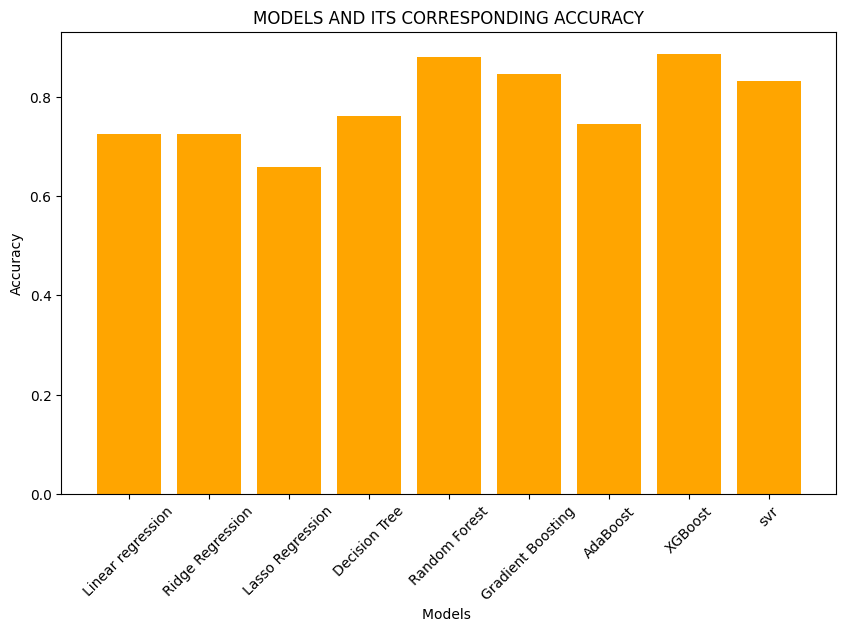

In [ ]:
# Creating bar chart of different models and its corresponding Accuracy:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
plt.bar(model_df['Model'],model_df['Accuracy'], color = "orange")

# Give lables to x and y axis:
plt.xlabel('Models ')
plt.ylabel('Accuracy')

# Give tittle to the chart:
plt.title('models and its corresponding Accuracy'.upper())

**STEP7:- HYPERPARAMETER TUNNING**

In [ ]:
# As the accuracy of lasso regression is low, so performing hyperparameter tunning to search best alpha value for model:
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

In [ ]:
# Searching for best alpha value:
grid_search = GridSearchCV(estimator=Lasso_Regression, param_grid=param_grid_lasso, cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Lasso(alpha=0.1),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
# Best alpha value:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'alpha': 0.001}


In [ ]:
# Again train lasso model with 0.001 alpha value:
Lasso_Regression_1 =  Lasso(alpha = 0.001)

In [ ]:
# Fit model and make predictions:
Lasso_Regression_1.fit(X_train_scaled, y_train)
final_lasso_y = Lasso_Regression_1.predict(X_test_scaled)

In [ ]:
# r2 score of new trained model
final_lasso_accuracy = r2_score(y_test, final_lasso_y)
final_lasso_accuracy

0.7251363203011312

In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [ ]:
grid_search_xgb = GridSearchCV(XGBoost, param_grid_xgb, cv=5, verbose=2)
grid_search_xgb.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [ ]:
best_params_xgb = grid_search_xgb.best_params_
print("Best hyperparameters:", best_params_xgb)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}


In [ ]:
XGBoost = XGBRegressor(learning_rate = 0.1, max_depth = 7, n_estimators = 300)
XGBoost.fit(X_train_scaled, y_train)
final_xgb_y = XGBoost.predict(X_test_scaled)

In [ ]:
final_xgb_accuracy = r2_score(y_test, final_xgb_y)
final_xgb_accuracy

0.8892453381768517

In [ ]:
# As XGBoost is performing best among all the models. so this model is used for final predictions:
predictions = XGBoost.predict(X_test_scaled)

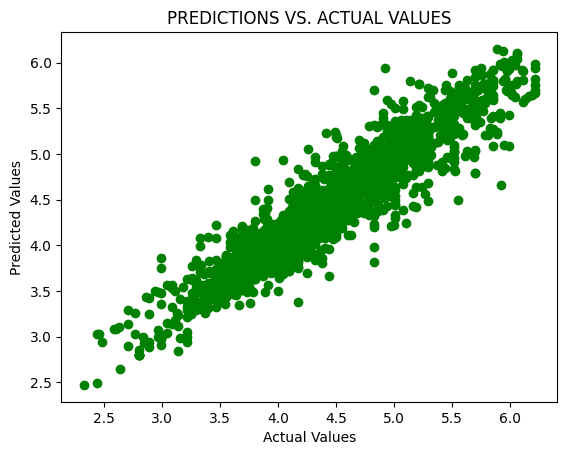

In [ ]:
# Creating scatter plot of actual and predicted values:
plt.scatter(y_test, predictions, color = "green")

# Give x and y labels and tittle to the plot:
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predictions vs. Actual Values".upper())
plt.show()